# MSA 2023 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
#Reading in CSV file
ExamData = pd.read_csv('exam_scores.csv')

#printing first 10 records
ExamData.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [3]:
#Finding number of records in file
ExamData.shape

(30641, 15)

In [4]:
#Finding number of null values
ExamData.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [26]:
#finding proportion binary
NumMale = ExamData.Gender.value_counts().male
ProportionMale = NumMale/ExamData.shape[0]
NullGender = ExamData.Gender.isnull().sum()/ExamData.shape[0]

print("The proportion of males in the dataset is " + str(ProportionMale))
print("The proportion where gender is null is "+ str(NullGender))


The proportion of males in the dataset is 0.496622172905584
The proportion where gender is null is 0.0


In [27]:
#finding proportion binary
NumStdMeal = ExamData.LunchType.value_counts().standard
ProportionStdMeal = NumStdMeal/ExamData.shape[0]
NullLunch = ExamData.LunchType.isnull().sum()/ExamData.shape[0]


print("The proportion with standard meals in the dataset is " + str(ProportionStdMeal))
print("The proportion where lunch type is null is "+ str(NullLunch))


The proportion with standard meals in the dataset is 0.6496197904768121
The proportion where lunch type is null is 0.0


In [28]:
#finding proportion binary
NumNoPrep = ExamData.TestPrep.value_counts().none
ProportionNoPrep = NumNoPrep/ExamData.shape[0]
NullPrep = ExamData.TestPrep.isnull().sum()/ExamData.shape[0]


print("The proportion with no test prep in the dataset is " + str(ProportionNoPrep))
print("The proportion where test prep is null is "+ str(NullPrep))



The proportion with no test prep in the dataset is 0.6153846153846154
The proportion where test prep is null is 0.05972389935054339


In [29]:
#finding proportion binary
NumFirstChild = ExamData.IsFirstChild.value_counts().yes
ProportionFirstChild = NumFirstChild/ExamData.shape[0]
NullFirstChild = ExamData.IsFirstChild.isnull().sum()/ExamData.shape[0]


print("The proportion of first children in the dataset is " + str(ProportionFirstChild))
print("The proportion where is first child is null is "+ str(NullFirstChild))



The proportion of first children in the dataset is 0.6227603537743546
The proportion where is first child is null is 0.029502953558956952


In [10]:
#finding counts cat
EthnicProp = ExamData.EthnicGroup.value_counts()/ExamData.shape[0]
nullEthnic = ExamData.EthnicGroup.isnull().sum()/ExamData.shape[0]


print(EthnicProp)
print("The proportion where ethnic group is null is "+ str(nullEthnic))


group C    0.300643
group D    0.244868
group B    0.190137
group E    0.131882
group A    0.072419
Name: EthnicGroup, dtype: float64
The proportion where ethnic gorup is null is 0.06005025945628406


In [12]:
#finding counts cat
ParentEdProp = ExamData.ParentEduc.value_counts()/ExamData.shape[0]
ParentEdNull = ExamData.ParentEduc.isnull().sum()/ExamData.shape[0]


print(ParentEdProp)
print("The proportion where parent education is null is "+ str(ParentEdNull))


some college          0.216475
high school           0.185601
associate's degree    0.181130
some high school      0.180053
bachelor's degree     0.110506
master's degree       0.066023
Name: ParentEduc, dtype: float64
The proportion where parent education is null is 0.0602134395091544


In [15]:
#finding counts cat
ParentMProp = ExamData.ParentMaritalStatus.value_counts()/ExamData.shape[0]
ParentMNull = ExamData.ParentMaritalStatus.isnull().sum()/ExamData.shape[0]


print(ParentMProp)
print("The proportion where parent martial status is null is "+ str(ParentMNull))


married     0.549721
single      0.231618
divorced    0.160537
widowed     0.019288
Name: ParentMaritalStatus, dtype: float64
The proportion where parent martial status is null is 0.038836852583140236


In [20]:
#finding counts cat
SportProp = ExamData.PracticeSport.value_counts()/ExamData.shape[0]
SportNull = ExamData.PracticeSport.isnull().sum()/ExamData.shape[0]


print(SportProp)
print("The proportion where sport practice is null is "+ str(SportNull))


sometimes    0.496492
regularly    0.352240
never        0.130675
Name: PracticeSport, dtype: float64
The proportion where sport practice is null is 0.020593322672236545


In [22]:
#finding counts cat
TranspProp = ExamData.TransportMeans.value_counts()/ExamData.shape[0]
TranspNull = ExamData.TransportMeans.isnull().sum()/ExamData.shape[0]


print(TranspProp)
print("The proportion where transport means is null is "+ str(TranspNull))


school_bus    0.526908
private       0.370810
Name: TransportMeans, dtype: float64
The proportion where transport means is null is 0.10228125713912731


In [24]:
#finding counts cat
HoursProp = ExamData.WklyStudyHours.value_counts()/ExamData.shape[0]
HoursNull = ExamData.WklyStudyHours.isnull().sum()/ExamData.shape[0]


print(HoursProp)
print("The proportion where study hours is null is "+ str(HoursNull))


5 - 10    0.530205
< 5       0.268855
> 10      0.169773
Name: WklyStudyHours, dtype: float64
The proportion where study hours is null is 0.031167390098234393


In [37]:
#Finding Mean and standard deviation 
MeanSiblings = ExamData.NrSiblings.mean()
SiblingsStd = ExamData.NrSiblings.std()
NullSiblings = ExamData.NrSiblings.isnull().sum()/ExamData.shape[0]

print("Mean number of siblings is " + str(MeanSiblings) + "\nStandard deviation of siblings is " + str(SiblingsStd))
print("The proportion where number of siblings is null is "+ str(NullSiblings))


Mean number of siblings is 2.1458942516082424
Standard deviation of siblings is 1.4582424759684511
The proportion where number of siblings is null is 0.05130380862243399


In [41]:
#Finding Mean and standard deviation 
MeanMath = ExamData.MathScore.mean()
MathStd = ExamData.MathScore.std()
NullMath = ExamData.MathScore.isnull().sum()/ExamData.shape[0]

print("Mean math score is " + str(MeanMath) + "\nStandard deviation of math score is " + str(MathStd))
print("The proportion where math score is null is "+ str(NullMath))


Mean math score is 66.5584021409223
Standard deviation of math score is 15.3616156153448
The proportion where math score is null is 0.0


In [42]:
#Finding Mean and standard deviation 
MeanReading = ExamData.ReadingScore.mean()
ReadingStd = ExamData.ReadingScore.std()
NullReading = ExamData.ReadingScore.isnull().sum()/ExamData.shape[0]

print("Mean reading score is " + str(MeanReading) + "\nStandard deviation of reading score is " + str(ReadingStd))
print("The proportion where reading score is null is "+ str(NullReading))


Mean reading score is 69.37753337032082
Standard deviation of reading score is 14.758951673577881
The proportion where reading score is null is 0.0


In [43]:
#Finding Mean and standard deviation 
MeanWriting = ExamData.WritingScore.mean()
WritingStd = ExamData.WritingScore.std()
NullWriting = ExamData.WritingScore.isnull().sum()/ExamData.shape[0]

print("Mean writing score is " + str(MeanWriting) + "\nStandard deviation of writing score is " + str(WritingStd))
print("The proportion where writing score is null is "+ str(NullWriting))


Mean writing score is 68.41862210763357
Standard deviation of writing score is 15.443524814264753
The proportion where writing score is null is 0.0


In [30]:
ExamData.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [44]:
#plotting box and whisker graphs for appropriate values
import graphing


graphing.box_and_whisker(ExamData, label_x="Gender", label_y="MathScore", show=True)

graphing.box_and_whisker(ExamData, label_x="Gender", label_y="ReadingScore", show=True)

graphing.box_and_whisker(ExamData, label_x="Gender", label_y="WritingScore")





## 2. Clean data

In [6]:
#dropping null
ExamData = ExamData.dropna()
ExamData.shape

(19243, 15)

In [182]:
#converting  to onehot then dropping the initial professions column and checking the resulting first rows
MarketDataOneHot = pd.get_dummies(MarketData, columns=["Profession"], drop_first=False)
MarketDataOneHot["Profession"] = MarketData.Profession

MarketDataOneHot = MarketDataOneHot.drop('Profession', axis=1)
MarketData = MarketDataOneHot
MarketData.head()


,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,Male,No,22,No,1.0,Low,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0
2,466315,Female,Yes,67,Yes,1.0,Low,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0
3,461735,Male,Yes,67,Yes,0.0,High,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0
5,461319,Male,Yes,56,No,0.0,Average,2.0,Cat_6,C,1,0,0,0,0,0,0,0,0
6,460156,Male,No,32,Yes,1.0,Low,3.0,Cat_6,C,0,0,0,0,0,1,0,0,0


In [184]:
#removing unique values
MarketData = MarketData.drop('ID', axis=1)

In [185]:
#Converting to boolean value
MarketData = MarketData.replace(to_replace="Male", value=1)
MarketData = MarketData.replace(to_replace="Female", value=0)

MarketData = MarketData.rename(columns={"Gender":"Is_Male"})


MarketData.head()


,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,No,22,No,1.0,Low,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,Yes,67,Yes,1.0,Low,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,Yes,67,Yes,0.0,High,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,Yes,56,No,0.0,Average,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,No,32,Yes,1.0,Low,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [187]:
#Converting to ordinal
MarketData = MarketData.replace(to_replace="Low", value=1)
MarketData = MarketData.replace(to_replace="Average", value=2)
MarketData = MarketData.replace(to_replace="High", value=3)

MarketData.head()

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,1,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.0,3,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,2,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,1,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [188]:
#normalising the initial numerical columns
for col in ('Age', 'Work_Experience', 'Family_Size'):
    MarketData[col] = MarketData[col]  / MarketData[col].abs().max()

Now all are data is numerical/boolean, and while this does make it more difficult to read, it means ml models will have a much easier time learning correlations


## 3. Visualise data

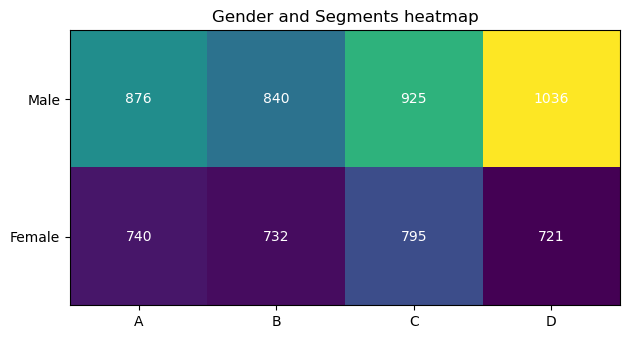

In [189]:
#Binary heatmap
MaleMarketData = MarketData[ MarketData["Is_Male"] == 1]
FemaleMarketData = MarketData[ MarketData["Is_Male"] == 0]

SegmentsMale =  MaleMarketData.Segmentation.value_counts()
SegmentsFemale =  FemaleMarketData.Segmentation.value_counts()


SegmentsMale = [SegmentsMale['A'], SegmentsMale['B'], SegmentsMale['C'], SegmentsMale['D']]
SegmentsFemale = [SegmentsFemale['A'], SegmentsFemale['B'], SegmentsFemale['C'], SegmentsFemale['D']]

Segments = [SegmentsMale, SegmentsFemale]


Gender = ['Male', 'Female']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Gender)), labels=Gender)


# Loop over data dimensions and create text annotations.
for i in range(len(Gender)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Gender and Segments heatmap")
fig.tight_layout()
plt.show()

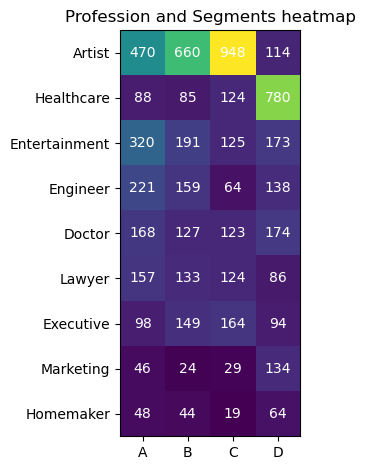

In [192]:
#Multi category heatmap
Professions = ['Artist','Healthcare','Entertainment','Engineer','Doctor','Lawyer','Executive','Marketing','Homemaker']
Counts = []

for i in Professions:
    tempstring = "Profession_" + i
    tempdf = MarketData[MarketData[tempstring] == 1]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Professions)), labels=Professions)


# Loop over data dimensions and create text annotations.
for i in range(len(Professions)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Profession and Segments heatmap")
fig.tight_layout()
plt.show()

## 4. Identify correlated variables

C:\Users\JackM\AppData\Local\Temp\ipykernel_12056\2204324990.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

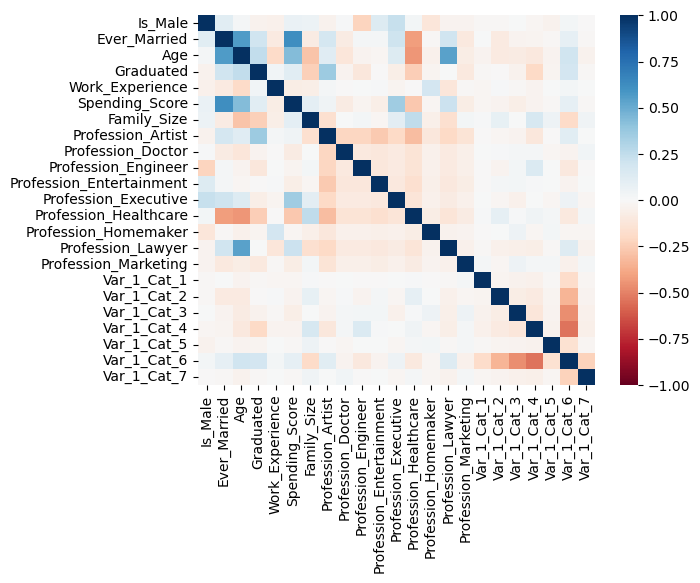

In [195]:
#Generating a correlation matrix, then plotting that as a heatmap.
corr = MarketData.corr()

sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)

In [196]:
#writing output to csv file, and giving a final display of top 10 rows
MarketData.to_csv('PreprocessedMarketData.csv')
MarketData.head(10)

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.247191,0,0.071429,1,0.444444,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0.752809,1,0.071429,1,0.111111,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0.752809,1,0.000000,3,0.222222,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,0.629213,0,0.000000,2,0.222222,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,0.359551,1,0.071429,1,0.333333,C,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0.370787,1,0.071429,1,0.333333,D,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0.685393,1,0.000000,1,0.333333,D,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0.617978,1,0.071429,2,0.444444,C,1,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0.292135,1,0.071429,1,0.333333,A,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,0,0.213483,0,0.285714,1,0.444444,D,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. Summary

I have cleaned the data by removing records with null values, converting categorical data to one-hots, converted ordinal data to a sequence, and normalised numerical data.   
Then I made visualisations between the segment values (the goal of the classification) and the other values to find all had some correlation with the segments (none that need to be removed)  
After this I plotted the correlation matrix to find any correlations 